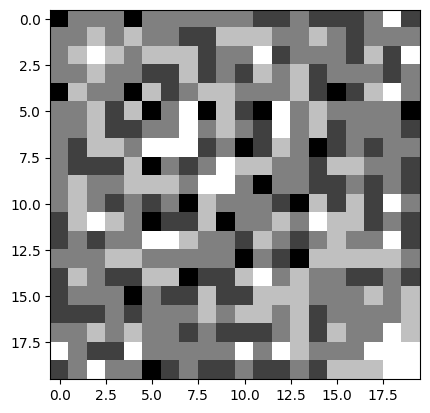

In [94]:
%reset -f 

import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(1)

n = 20  # number of spins
Jth = 0.1  # Jth sets the size of the random threshold values th
full_network = False  # Toggle between full and sparse Ising network

if full_network:
    # Full weight matrix
    J0 = 0  # J0 and J are as defined for the SK model
    J = 0.5
    w = J0/n + J/np.sqrt(n) * np.random.randn(n, n)
    w = np.triu(w, 1)  # Keep upper triangular part
    w += w.T  # Make the matrix symmetric
    c = ~(w == 0)  # Neighborhood graph fully connected
else:
    # Sparse weight matrix
    c1 = 0.5  # Connectivity is the approximate fraction of non-zero links in the random graph on n spins
    beta = 0.5
    w = sp.rand(n, n, density=c1, format='csr')
    w.data = np.random.choice([-beta, beta], size=w.nnz)  # Assign +/-beta randomly to non-zero links
    w = (w + w.T) / 2  # Make the matrix symmetric
    c = ~(w.toarray() == 0)  # Sparse 0,1 neighborhood graph

th = np.random.randn(n) * Jth

plt.imshow(w.toarray(), cmap='gray')
# Exact
def s_all(n):
    """Generate all 2^n spin configurations for n spins."""
    return np.array(np.meshgrid(*[[1, -1]] * n)).T.reshape(-1, n)

# Get energy for all spin configurations
sa = s_all(n)  # All 2^n spin configurations
Ea = 0.5 * np.sum(sa * (w @ sa.T).T, axis=1) + sa @ th  # Energies of all 2^n configurations
Ea = np.exp(Ea)
Z = np.sum(Ea)
p_ex = Ea / Z  # Probabilities of all 2^n configurations

# Get mean values and correlations
m_ex = sa.T @ p_ex  # Exact mean values of n spins
klad = (p_ex[:, None] * sa)
chi_ex = sa.T @ klad - np.outer(m_ex, m_ex)  # Exact connected correlations


In [91]:
%reset -f 
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Hamiltonian
def H(spin_state, couplings):
    pairs = np.array(list(itertools.product(range(0, len([1, 2, 3])), repeat=2)))
    energy = 0
    for m, n in pairs:
        energy += 0.5 * couplings[(m, n)] * spin_state[m] * spin_state[n]
    return energy

def P_spin(Z, spin_state, couplings, beta):
    return 1 / Z  * np.exp(beta * H(spin_state, couplings))
P = {'spin' : P_spin}

def get_Z(spin_states, couplings, beta):
    return np.sum([np.exp(-beta * H(state, couplings)) for state in spin_states] )
        
def make_symmetric(matrix):
    return np.triu(matrix, 1) + np.triu(matrix, 1).T

def get_couplings(J0, J, n):
    mean = J0 / n
    std = J / np.sqrt(n)
    # randn samples from normal distribution
    return make_symmetric(mean + std * np.random.randn(n, n))


def main():
    # Params
    n = 10
    beta = 0.1
    J0 = 0 
    J = 0.5
    # Get probablity
    spin_state_space = np.array(list(itertools.product([-1 ,1], repeat=n)))
    couplings = get_couplings(J0, J, n)
    Z = get_Z(spin_state_space, couplings, beta)
    ps_state = [P['spin'](Z, spin_state, couplings, beta) for spin_state in spin_state_space]

    # Get exact spin expectation



main()


0.9999966287987031


In [77]:
np.random.randn

<function RandomState.randn>

8

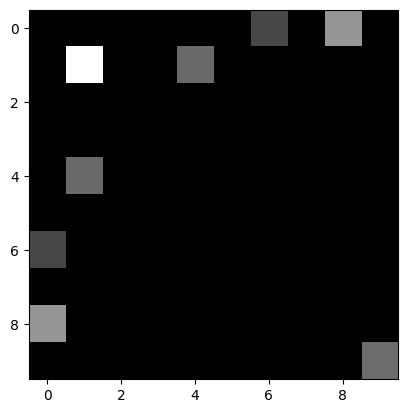

In [76]:
%reset -f 

import scipy
import numpy as np
import matplotlib.pyplot as plt

n = 10
# Make spare random matrix
mat = scipy.sparse.rand(10, 10, density=0.1)
# Make it symmetric
mat = scipy.sparse.triu(mat) 
mat += mat.T

plt.imshow(mat.toarray(), cmap='gray')

mat.nnz
